Libraries

In [ ]:
import numpy as np  
import requests
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from typing import List, Tuple, Any, Dict, Optional

import cv2

# Functions

In [ ]:
def show(img:np.ndarray):
    im = Image.fromarray(img)
    print(im.size, im.mode, im.format, img.min(),  img.max())
    display(im)

def load_from_url(url: str) -> np.ndarray:
    return np.asarray(Image.open(requests.get(url, stream=True).raw))

def debug_ndarray(arr:np.ndarray, name:str='') -> None:
    print(name, arr.shape, arr.dtype, arr.min(), arr.max())

def imshow(img):
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

Zigzag and inverse Zigzag

In [ ]:
def zigzag(matrix: np.ndarray) -> np.ndarray:
    """
    computes the zigzag of a quantized block
    :param numpy.ndarray matrix: quantized matrix
    :returns: zigzag vectors in an array
    """
    # initializing the variables
    h = 0
    v = 0
    v_min = 0
    h_min = 0
    v_max = matrix.shape[0]
    h_max = matrix.shape[1]
    i = 0
    output = np.zeros((v_max * h_max))

    while (v < v_max) and (h < h_max):
        if ((h + v) % 2) == 0:  # going up
            if v == v_min:
                output[i] = matrix[v, h]  # first line
                if h == h_max:
                    v = v + 1
                else:
                    h = h + 1
                i = i + 1
            elif (h == h_max - 1) and (v < v_max):  # last column
                output[i] = matrix[v, h]
                v = v + 1
                i = i + 1
            elif (v > v_min) and (h < h_max - 1):  # all other cases
                output[i] = matrix[v, h]
                v = v - 1
                h = h + 1
                i = i + 1
        else:  # going down
            if (v == v_max - 1) and (h <= h_max - 1):  # last line
                output[i] = matrix[v, h]
                h = h + 1
                i = i + 1
            elif h == h_min:  # first column
                output[i] = matrix[v, h]
                if v == v_max - 1:
                    h = h + 1
                else:
                    v = v + 1
                i = i + 1
            elif (v < v_max - 1) and (h > h_min):  # all other cases
                output[i] = matrix[v, h]
                v = v + 1
                h = h - 1
                i = i + 1
        if (v == v_max - 1) and (h == h_max - 1):  # bottom right element
            output[i] = matrix[v, h]
            break
    return output

    #test function 

rdMatrix = np.round(np.random.rand(8,8)*10)
print(rdMatrix)
print(zigzag(rdMatrix))

[[4. 1. 2. 4. 3. 4. 2. 5.]
 [4. 8. 3. 7. 3. 8. 6. 5.]
 [4. 8. 7. 7. 8. 5. 7. 3.]
 [7. 2. 9. 1. 8. 6. 5. 4.]
 [0. 5. 1. 1. 6. 5. 9. 2.]
 [9. 3. 3. 7. 7. 8. 7. 4.]
 [3. 3. 1. 8. 3. 7. 1. 1.]
 [2. 6. 5. 5. 3. 7. 3. 6.]]
[4. 1. 4. 4. 8. 2. 4. 3. 8. 7. 0. 2. 7. 7. 3. 4. 3. 7. 9. 5. 9. 3. 3. 1.
 1. 8. 8. 2. 5. 6. 5. 8. 1. 3. 3. 2. 6. 1. 7. 6. 6. 7. 5. 3. 5. 5. 7. 8.
 5. 5. 3. 8. 9. 4. 2. 7. 7. 3. 7. 1. 4. 1. 3. 6.]


In [ ]:
def inverse_zigzag(input_array: np.ndarray) -> np.ndarray:
    """
    Computes the inverse zigzag of a flattened array
    :param input_array: flattened array of zigzag values
    :return: the original matrix before zigzag
    """
    size = int(np.sqrt(len(input_array)))
    output_matrix = np.zeros((size, size))
    row, col = 0, 0

    for i in range(len(input_array)):
        output_matrix[row][col] = input_array[i]
        if (row + col) % 2 == 0:
            if col == size - 1:
                row += 1
            elif row == 0:
                col += 1
            else:
                row -= 1
                col += 1
        else:
            if row == size - 1:
                col += 1
            elif col == 0:
                row += 1
            else:
                row += 1
                col -= 1

    return output_matrix

print(rdMatrix)
print('inverse_zigzag(zigzag(rdMatrix)):')
print(inverse_zigzag(zigzag(rdMatrix)))
print('rdMatrix-inverse_zigzag(zigzag(rdMatrix)):')
print(rdMatrix-inverse_zigzag(zigzag(rdMatrix)))

[[4. 1. 2. 4. 3. 4. 2. 5.]
 [4. 8. 3. 7. 3. 8. 6. 5.]
 [4. 8. 7. 7. 8. 5. 7. 3.]
 [7. 2. 9. 1. 8. 6. 5. 4.]
 [0. 5. 1. 1. 6. 5. 9. 2.]
 [9. 3. 3. 7. 7. 8. 7. 4.]
 [3. 3. 1. 8. 3. 7. 1. 1.]
 [2. 6. 5. 5. 3. 7. 3. 6.]]
inverse_zigzag(zigzag(rdMatrix)):
[[4. 1. 2. 4. 3. 4. 2. 5.]
 [4. 8. 3. 7. 3. 8. 6. 5.]
 [4. 8. 7. 7. 8. 5. 7. 3.]
 [7. 2. 9. 1. 8. 6. 5. 4.]
 [0. 5. 1. 1. 6. 5. 9. 2.]
 [9. 3. 3. 7. 7. 8. 7. 4.]
 [3. 3. 1. 8. 3. 7. 1. 1.]
 [2. 6. 5. 5. 3. 7. 3. 6.]]
rdMatrix-inverse_zigzag(zigzag(rdMatrix)):
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
def rlencode(data:list, symbol:int=0, escape=257) -> np.ndarray:
    '''
    Encode a list of values using run length encoding
    when `symbol` is encountered, 
    the next value is `escape` followed by the number of `symbol`.
    '''
    out = []
    ###
    #TODO
   
    i = 0
    while i < len(data):
        if data[i] != symbol:
            # Count consecutive non-symbol elements
            
            out.append(data[i])
            i += 1
            
        else:
            # Count consecutive symbol elements
            count = 1
            while i + count < len(data) and data[i + count] == symbol:
              count += 1

            if count >2:
              out.append(escape)
              out.append(count)
            else: 
              for j in range(count):
                out.append(symbol)
              

            i += count
    

    
    return np.array(out)

out = rlencode([0, 0, 1, 1, 1, 2, 2, 3,0,0,0,0,0,0,0,1])
print([0, 0, 1, 1, 1, 2, 2, 3,0,0,0,0,0,0,0,1])
print('rlencode(out): ')
print(out)

def rldecode(data: np.ndarray, symbol: int = 0, escape: int = 257) -> list:
    '''
    Decode a list of values that has been run length encoded
    '''
    data = np.int32(data)
    out = []
    i = 0
    while i < len(data):
        if data[i] != escape:
            out.append(data[i])
            i += 1
        else:
            count = data[i+1]
            out.extend([symbol]*count)
            i += 2
    return out

print('rldecode(out):')
print(rldecode(out))


[0, 0, 1, 1, 1, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 1]
rlencode(out): 
[  0   0   1   1   1   2   2   3 257   7   1]
rldecode(out):
[0, 0, 1, 1, 1, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 1]


Count Symbols

In [ ]:
def count_symbols(data:list) -> Dict[Any, int]:
    '''
    Compute the frequency of each value in the list
    '''
    freq = {}
    ###
    #TODO
    for i in data:
        if i in freq:
            freq[i] += 1
        else:
            freq[i] = 1
    ###
    return freq


Huffman code

In [ ]:
def compute_huffman_tree(data:list, freq:Optional[dict]=None) -> Tuple[int, Any, Any]:
    '''
    Compute a huffman tree from a frequency table of values
    Return the root node of the tree
    '''
    if freq is None:
        freq: Dict[Any, int] = count_symbols(data)

    # create a list of nodes
    nodes = []
    for symbol, freq in freq.items():
        nodes.append((freq, symbol))
    
    # sort the list of nodes by count
    nodes.sort(key=lambda x: x[0])

    # create a tree
    while len(nodes) > 1:
        # get the two lowest frequency nodes
        left, right = nodes[:2]
        
        # create a new node with the sum of the frequencies
        new_node_count = left[0] + right[0]
        new_node = (new_node_count, left, right)
        # remove the two lowest frequency nodes
        nodes = nodes[2:]
        # insert the new node
        nodes.append(new_node)
        # sort the nodes by frequency
        nodes.sort(key=lambda x: x[0])

    # return the root node
    return nodes[0]

sentence = "this is an example of a huffman tree"
#convert sentence to list of characters
data = list(sentence)

from pprint import pprint

data_tree = compute_huffman_tree(data)
pprint(data_tree)

(36,
 (16,
  (8, (4, 'a'), (4, 'e')),
  (8, (4, (2, 't'), (2, 'h')), (4, (2, 'i'), (2, 's')))),
 (20,
  (8,
   (4, (2, 'n'), (2, 'm')),
   (4, (2, (1, 'x'), (1, 'p')), (2, (1, 'l'), (1, 'o')))),
  (12, (5, (2, (1, 'u'), (1, 'r')), (3, 'f')), (7, ' '))))


In [ ]:
def display_table(lines, code:dict, sep='\t'):
    '''
    Display a table of data with columns aligned
    '''
    cols_width = [max(len(str(x)) for x in col) for col in zip(*lines)]
    for line in lines:
        # adjust each column to its max width
        print(*[x.rjust(w) for x, w in zip(line, cols_width)], sep=sep)

def display_huffman_table(data, code:dict, sep='\t'):
    counts: dict = count_symbols(data)
    total = sum(counts.values())
    lines = [('Symbol', 'Code', 'Count', 'Frequency')]
    tmp = sorted(list(counts.keys()), key=lambda x: counts[x], reverse=True)
    for k in tmp:
        symbol = f"`{k}`"
        symbol_code = str(counts[k])
        count = str(code[k])
        freq = str(round(100 * counts[k] / total, 2))+'%'
        lines.append((symbol, symbol_code, count, freq))
    display_table(lines, code, sep=sep)

def bintree_to_table(node, path=None, left='0', right='1') -> Dict[str, str]:
    '''
    Build a huffman table from a huffman tree
    Return a dictionary of symbol:code
    '''
    if path is None:
        path = ''
    table = {}
    if len(node) == 2: # leaf node
        count, symbol = node
        table[symbol] = path
    else: # internal node
        node_left, node_right = node[1], node[2]
        left_path = bintree_to_table(node_left, path + left, left=left, right=right)
        right_path = bintree_to_table(node_right, path + right, left=left, right=right)
        table.update(left_path)
        table.update(right_path)
    
    return table

sentence = "this is an example of a huffman tree"
#convert sentence to list of characters
data = list(sentence)
data_tree = compute_huffman_tree(data)
data_table = bintree_to_table(data_tree)

# display the huffman table
display_huffman_table(data, data_table)

Symbol	Code	Count	Frequency
   ` `	   7	  111	   19.44%
   `a`	   4	  000	   11.11%
   `e`	   4	  001	   11.11%
   `f`	   3	 1101	    8.33%
   `t`	   2	 0100	    5.56%
   `h`	   2	 0101	    5.56%
   `i`	   2	 0110	    5.56%
   `s`	   2	 0111	    5.56%
   `n`	   2	 1000	    5.56%
   `m`	   2	 1001	    5.56%
   `x`	   1	10100	    2.78%
   `p`	   1	10101	    2.78%
   `l`	   1	10110	    2.78%
   `o`	   1	10111	    2.78%
   `u`	   1	11000	    2.78%
   `r`	   1	11001	    2.78%


In [ ]:
def construct_huffman_table(data:list) -> dict:
    '''
    Encode a list of values using huffman encoding and return the huffman table
    '''
    counts = count_symbols(data)
    tree = compute_huffman_tree(counts)
    table = bintree_to_table(tree)
    return table

def encode_huffman(data: list, table: dict) -> str:
    '''
    Encode a list of values using the huffman table dictionary
    Return the encoded string
    '''
    out = []
    for i in data:
        out.extend(table[i])
    out = ''.join(out) # list to string
    return out

def decode_huffman(encoded:str, table: dict) -> np.ndarray:
    '''
    Decode a list of values using huffman code dictionary
    '''
    data = []
    i = 0
    while i < len(encoded):
        for k, v in table.items():
            if encoded[i:].startswith(v): # prefix match
                data.append(k)
                i += len(v)
                break
    return np.array(data)

# testing
sentence = "this is an example of a huffman tree"
#convert sentence to list of characters
data = list(sentence)
table = construct_huffman_table(data)
print("Test 1")
print(table)

# Testing
print("Test 2")
data = [0, 1, 0, 0, 0, 0, 0, 2, 0, 4, 4, 2, 3]
data_table = construct_huffman_table(data)
print('Original :', data)

encoded = encode_huffman(data, data_table)
print('Encoded  :', encoded)

decoded = decode_huffman(encoded, data_table)
print('Decoded  :', decoded)


Test 1
{'t': '0000', 'h': '0001', 'i': '0010', 's': '0011', ' ': '0100', 'a': '0101', 'n': '0110', 'e': '0111', 'x': '1000', 'm': '1001', 'p': '1010', 'l': '1011', 'o': '1100', 'f': '1101', 'u': '1110', 'r': '1111'}
Test 2
Original : [0, 1, 0, 0, 0, 0, 0, 2, 0, 4, 4, 2, 3]
Encoded  : 1101111101101101101100011001010010
Decoded  : [0 1 0 0 0 0 0 2 0 4 4 2 3]


# Encoding

Defining qY and qC

In [ ]:
# define quantization tables
qY = np.array([[16, 11, 10, 16, 24, 40, 51, 61],  # luminance quantization table
                [12, 12, 14, 19, 26, 48, 60, 55],
                [14, 13, 16, 24, 40, 57, 69, 56],
                [14, 17, 22, 29, 51, 87, 80, 62],
                [18, 22, 37, 56, 68, 109, 103, 77],
                [24, 35, 55, 64, 81, 104, 113, 92],
                [49, 64, 78, 87, 103, 121, 120, 101],
                [72, 92, 95, 98, 112, 100, 103, 99]])

qC = np.array([[17, 18, 24, 47, 99, 99, 99, 99],  # chrominance quantization table
                [18, 21, 26, 66, 99, 99, 99, 99],
                [24, 26, 56, 99, 99, 99, 99, 99],
                [47, 66, 99, 99, 99, 99, 99, 99],
                [99, 99, 99, 99, 99, 99, 99, 99],
                [99, 99, 99, 99, 99, 99, 99, 99],
                [99, 99, 99, 99, 99, 99, 99, 99],
                [99, 99, 99, 99, 99, 99, 99, 99]])

In [ ]:
def padding(img,blockSize):
  width = len(img[0])
  height = len(img)
  if width % blockSize != 0 :
    diffw = width % blockSize
    for i in range(diffw):
    
      img = np.concatenate((img, img[:, -1].reshape((-1, 1))), axis=1)

  if height % blockSize != 0 :
    diffh = height % blockSize
    
    for i in range(diffh):
      img = np.vstack((img,img[-1, :]))
      
  return img 

In [ ]:
def EncodeImg_grey(img,blockSize):
  h, w = img.shape
  vRLC = []
  for i in range(h//blockSize):
    for j in range(w//blockSize):
        block = img[ i*8:i*8+8, j*8:j*8+8] - 128 # extract the block and center it 
        # dct
        dctBlock = cv2.dct(np.float32(block))
        # quantification
        F = np.round(dctBlock/qY)    
        # zigzag (1D) 
        ZZ_Blk = zigzag(F)       
        # run length coding (1D)
        # can use `extend` function of numpy vRLC.extend()
        vRLC.extend(rlencode(ZZ_Blk))
  return vRLC

Testing encoding 

(256, 256) RGB None 0 255


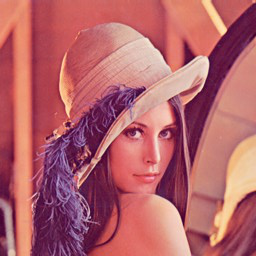

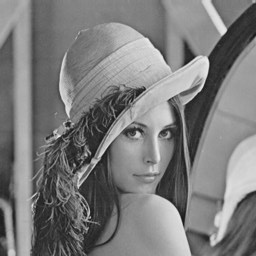

In [ ]:
url = "http://www.lenna.org/len_std.jpg"
imgOriginal = load_from_url(url)
show(imgOriginal)
#img_grey = cv2.cvtColor(imgOriginal, cv2.COLOR_RGB2GRAY)
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img_grey = rgb2gray(imgOriginal)
imshow(img_grey)

In [ ]:
vRLC = EncodeImg_grey(img_grey,8)
# Huffman
mat_table: dict = construct_huffman_table(vRLC)
mat_encoded: str = encode_huffman(vRLC,mat_table)

print('Original :', vRLC)
print('Encoded  :', mat_encoded)
decoded = decode_huffman(mat_encoded, mat_table)
print('Decoded  :', decoded)

Original : [15.0, 1.0, 1.0, 257.0, 61.0, 13.0, 257.0, 63.0, 18.0, -4.0, 0.0, 0.0, -1.0, -1.0, 0.0, 0.0, 1.0, 257.0, 55.0, 10.0, 15.0, 2.0, 0.0, 0.0, -4.0, 1.0, 257.0, 57.0, -15.0, -3.0, 1.0, 0.0, 0.0, 1.0, 1.0, 257.0, 57.0, -11.0, 0.0, 1.0, 1.0, -1.0, 257.0, 59.0, -9.0, -3.0, 1.0, 0.0, 0.0, 1.0, 257.0, 58.0, -2.0, -2.0, 257.0, 62.0, 1.0, -1.0, 1.0, 257.0, 61.0, 1.0, 257.0, 3.0, -1.0, 257.0, 59.0, 3.0, -1.0, 257.0, 62.0, 2.0, 257.0, 63.0, 2.0, 0.0, 1.0, 257.0, 61.0, 1.0, 1.0, 257.0, 62.0, 1.0, 257.0, 63.0, 2.0, 1.0, 257.0, 62.0, 1.0, 1.0, 257.0, 3.0, 1.0, 0.0, 1.0, 257.0, 56.0, 0.0, 0.0, 1.0, 257.0, 61.0, 257, 64, -6.0, 4.0, 257.0, 3.0, -1.0, 257.0, 58.0, 1.0, -12.0, 4.0, 257.0, 4.0, -2.0, 257.0, 5.0, -1.0, 257.0, 50.0, 14.0, 1.0, -1.0, 0.0, 1.0, -1.0, -1.0, 1.0, 257.0, 56.0, 14.0, 0.0, -1.0, 1.0, 0.0, -1.0, 257.0, 58.0, 13.0, 0.0, -1.0, 257.0, 61.0, 13.0, 0.0, 1.0, 257.0, 61.0, 30.0, -17.0, 6.0, -1.0, 1.0, -3.0, 0.0, -4.0, 1.0, 0.0, 0.0, -1.0, 1.0, -1.0, 257.0, 50.0, 17.0, 32.0, -10.0,

In [ ]:
# number of bits in original image
Ho, Wo = img_grey.shape
print(f'Number of bits in original image: {Ho*Wo*8} ')
print(f'Number of elelemnts (vRLC): {len(vRLC)} ')
print(f'Number of bits (encoded): {len(mat_encoded)}')
print(f'Compression ratio: {Ho*Wo*8/(len(mat_encoded))}')


#print(size_yRLC)

Number of bits in original image: 524288 
Number of elelemnts (vRLC): 15129 
Number of bits (encoded): 105634
Compression ratio: 4.963250468599125


In [ ]:
decoded - vRLC

array([0., 0., 0., ..., 0., 0., 0.])

# Decoding

In [ ]:
# compute the remainder of the vector length divided by 8
remainder = len(vRLC) % 8**2
print(len(vRLC))
ZZ_Blk = rldecode(vRLC)
print(len(ZZ_Blk)/64)
# append zeros to the vector until its length is a multiple of 8
vRLC =  np.append(vRLC, np.zeros(8**2-remainder))
print(len(vRLC)/64)

15129
1024.0
237.0


In [ ]:
def DecodeImg_grey(vRLC, h, w, blockSize):
    img = np.zeros((h, w), dtype=np.uint8)
    # run length decoding (1D)
    ZZ_Blk = rldecode(vRLC)
    for i in range(h // blockSize):
        for j in range(w // blockSize):
            # inverse zigzag (2D)
            F = inverse_zigzag(ZZ_Blk[:blockSize**2])
            ZZ_Blk= ZZ_Blk[blockSize**2:] 
            # dequantification
            dctBlock = np.multiply(F, qY)
            # inverse DCT
            block = cv2.idct(dctBlock)
            # add 128 and clip to 8-bit range
            block = np.clip(block + 128, 0, 255).astype(np.uint8)
            # insert block into image
            img[i*blockSize:i*blockSize+blockSize, j*blockSize:j*blockSize+blockSize] = block
    return img

Testing

(256, 256) L None 0 246


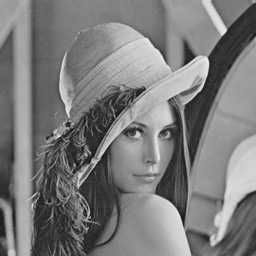

In [ ]:
h, w = img_grey.shape
decoded_img = DecodeImg_grey(vRLC, h, w, 8)
show(decoded_img)

MSE ERROR 

In [ ]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [ ]:
print(mse(decoded_img,img_grey))

14801.968933105469


In [ ]:
from math import *
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr


In [ ]:

value_gray = PSNR(decoded_img,img_grey)
print(f"PSNR value is {value_gray} dB")

PSNR value is 33.834747778122185 dB


PSNR is most commonly used to estimate the efficiency of compressors, filters, etc. The larger the value of PSNR, the more efficient is a corresponding compression or filter method.

# RGB Encoding /Decoding

In [ ]:
def EncodeImg_YCrCb(img,blockSize):
  Y  = img[:,:,0] 
  Cb  = img[:,:,1] 
  Cr  = img[:,:,2]
  h, w, c  = img.shape
  vRLC = []
  for i in range(h//blockSize):
    for j in range(w//blockSize):
        blockY = Y[ i*8:i*8+8, j*8:j*8+8] - 128
        blockCr = Cr[ i*8:i*8+8, j*8:j*8+8] - 128
        blockCb = Cb[ i*8:i*8+8, j*8:j*8+8] - 128 # extract the block and center it 
        # dct
        dctBlockY = cv2.dct(np.float32(blockY))
        dctBlockCr = cv2.dct(np.float32(blockCr))
        dctBlockCb = cv2.dct(np.float32(blockCb))
        # quantification
        FY = np.round(dctBlockY/qY) 
        FCr = np.round(dctBlockCr/qC)
        FCb = np.round(dctBlockCb/qC)   
        # zigzag (1D) 
        ZZ_BlkY = zigzag(FY) 
        ZZ_BlkCr = zigzag(FCr)
        ZZ_BlkCb = zigzag(FCb)      
        # run length coding (1D)
        # can use `extend` function of numpy vRLC.extend()
        vRLC.extend(rlencode(ZZ_BlkY))
        vRLC.extend(rlencode(ZZ_BlkCr))
        vRLC.extend(rlencode(ZZ_BlkCb))
  return vRLC

(256, 256) RGB None 20 239


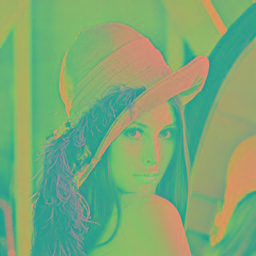

Original : [15.0, 1.0, 1.0, 257.0, 61.0, 109.0, 0.0, 1.0, 257.0, 61.0, 23.0, 0.0, -1.0, 257.0, 61.0, 13.0, 1.0, 257.0, 62.0, 108.0, 257.0, 63.0, 23.0, 257.0, 63.0, 18.0, -4.0, 0.0, 0.0, -1.0, -1.0, 0.0, 0.0, 1.0, 257.0, 55.0, 107.0, 257.0, 63.0, 22.0, 257.0, 63.0, 40.0, -41.0, -2.0, -3.0, 4.0, 42.0, -14.0, -2.0, 3.0, -3.0, -2.0, 3.0, -2.0, 0.0, 1.0, 3.0, 2.0, 0.0, -1.0, 2.0, -1.0, 0.0, 1.0, 0.0, 0.0, 1.0, -1.0, -3.0, 2.0, 1.0, -1.0, 1.0, 257.0, 8.0, -1.0, 1.0, -1.0, -1.0, 1.0, 257.0, 19.0, 109.0, -3.0, 1.0, 0.0, 0.0, 1.0, 257.0, 58.0, 24.0, -1.0, 257.0, 62.0, 113.0, -3.0, 1.0, 0.0, 0.0, 1.0, 1.0, 257.0, 57.0, 117.0, 1.0, 1.0, 257.0, 61.0, 23.0, -1.0, -1.0, 257.0, 61.0, 117.0, 0.0, 1.0, 1.0, -1.0, 257.0, 59.0, 115.0, 257.0, 63.0, 25.0, 0.0, -1.0, 257.0, 61.0, 119.0, -3.0, 1.0, 0.0, 0.0, 1.0, 257.0, 58.0, 114.0, 1.0, 257.0, 62.0, 24.0, 0.0, -1.0, 257.0, 61.0, 108.0, 27.0, -6.0, -11.0, 1.0, -19.0, 10.0, 6.0, 11.0, 6.0, -2.0, -8.0, -1.0, -1.0, -9.0, 4.0, -6.0, 0.0, 7.0, 2.0, 0.0, 1.0, 1.0,

In [127]:
Img_YCrCb = cv2.cvtColor(imgOriginal, cv2.COLOR_RGB2YCR_CB)
show(Img_YCrCb)
vRLC_YCrCb = EncodeImg_YCrCb(Img_YCrCb,8)
# Huffman
mat_table_YCrCb: dict = construct_huffman_table(vRLC_YCrCb)
mat_encoded_YCrCb: str = encode_huffman(vRLC_YCrCb,mat_table_YCrCb)

print('Original :', vRLC_YCrCb)
print('Encoded  :', mat_encoded_YCrCb)
decoded_YCrCb = decode_huffman(mat_encoded_YCrCb, mat_table_YCrCb)
print('Decoded  :', decoded_YCrCb)

In [ ]:
# number of bits in original image
h, w, c = Img_YCrCb.shape
print(f'Number of bits in original image: {h*w*8} ')
print(f'Number of elelemnts (vRLC): {len(vRLC_YCrCb)} ')
print(f'Number of bits (encoded): {len(mat_encoded_YCrCb)}')
print(f'Compression ratio: {h*w*8/(len(mat_encoded_YCrCb))}')


#print(size_yRLC)

Number of bits in original image: 524288 
Number of elelemnts (vRLC): 46150 
Number of bits (encoded): 368244
Compression ratio: 1.4237516429324035


In [ ]:
def DecodeImg_YCrCb(vRLC, h, w, blockSize):
    imgY = np.zeros((h, w), dtype=np.uint8)
    imgCr = np.zeros((h, w), dtype=np.uint8)
    imgCb = np.zeros((h, w), dtype=np.uint8)
    # run length decoding (1D)
    ZZ_Blk = rldecode(vRLC)
    for i in range(h // blockSize):
        for j in range(w // blockSize):
            # inverse zigzag (2D)
            FY = inverse_zigzag(ZZ_Blk[:blockSize**2])
            FCr = inverse_zigzag(ZZ_Blk[:blockSize**2])
            FCb = inverse_zigzag(ZZ_Blk[:blockSize**2])

            ZZ_Blk= ZZ_Blk[(blockSize**2)*3:] 
            # ZZ_Blk= ZZ_Blk[blockSize**2:] 
            # ZZ_Blk= ZZ_Blk[blockSize**2:] 
            # dequantification
            dctBlockY = np.multiply(FY, qY)
            dctBlockCr = np.multiply(FCr, qC)
            dctBlockCb = np.multiply(FCb, qC)
            # inverse DCT
            blockY = cv2.idct(dctBlockY)
            blockCr = cv2.idct(dctBlockCr)
            blockCb = cv2.idct(dctBlockCb)
            # add 128 and clip to 8-bit range
            blockY = np.clip(blockY + 128, 0, 255).astype(np.uint8)
            blockCr = np.clip(blockCr + 128, 0, 255).astype(np.uint8)
            blockCb = np.clip(blockCb + 128, 0, 255).astype(np.uint8)
            # insert block into image
            imgY[i*blockSize:i*blockSize+blockSize, j*blockSize:j*blockSize+blockSize] = blockY
            imgCr[i*blockSize:i*blockSize+blockSize, j*blockSize:j*blockSize+blockSize] = blockCr
            imgCb[i*blockSize:i*blockSize+blockSize, j*blockSize:j*blockSize+blockSize] = blockCb
    img = np.dstack((imgY, imgCb, imgCr)) 
    img = cv2.normalize(img, 0, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    
    return img

(256, 256) RGB None 0 255


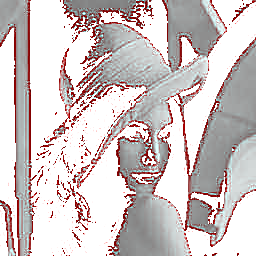

In [126]:
h, w, c = Img_YCrCb.shape
decoded_img_YCrCb = DecodeImg_YCrCb(vRLC_YCrCb, h, w, 8)

show(decoded_img_YCrCb)

MSE Error

In [128]:
print(mse(Img_YCrCb,decoded_img_YCrCb))

32329.714126586914


In [ ]:

value_gray = PSNR(decoded_img,img_grey)
print(f"PSNR value is {value_gray} dB")